F1 Score: 1.0
Precision (查准率): 1.0
Recall (查全率): 1.0
Confusion Matrix (混淆矩阵):
 [[10  0]
 [ 0 10]]


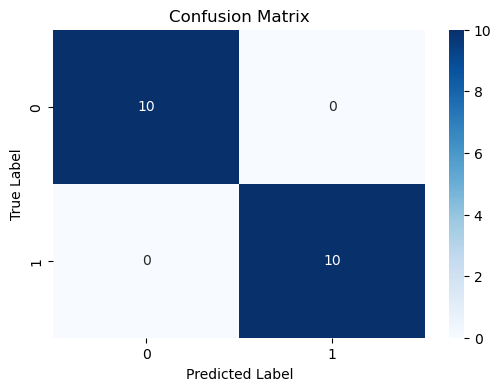

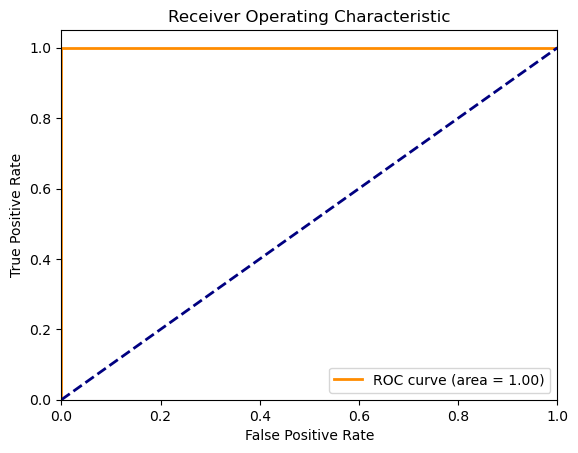

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 读取数据
data = pd.read_csv("iris_dataset.csv", header=0)

# 2. 选取前100行数据，并处理目标列
data = data.iloc[:100]  # 前100行数据
data.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "target_name"]
data['target_name'] = data['target_name'].astype('category').cat.codes  # 转换目标列为数字编码
X = data.iloc[:, :-1].astype(float)
y = data['target_name']

# 3. 数据划分（80%训练集，20%测试集）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. 标准化数据
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. 支持向量机模型
svm_model = SVC(kernel="linear", probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# 6. 预测
y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)[:, 1]

# 7. 评估指标
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# 打印评估结果
print("F1 Score:", f1)
print("Precision (查准率):", precision)
print("Recall (查全率):", recall)
print("Confusion Matrix (混淆矩阵):\n", conf_matrix)

# 可视化混淆矩阵
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 8. 绘制ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()